In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("titanic_train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Exploratory Data Analysis

In [4]:
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Analyzing Data

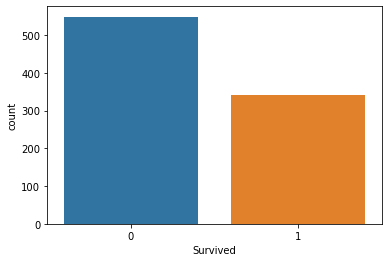

In [5]:
sns.countplot(x="Survived",data=df);

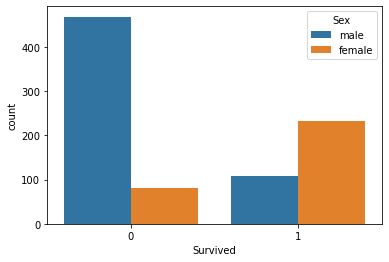

In [6]:
sns.countplot(x="Survived",hue="Sex",data=df);

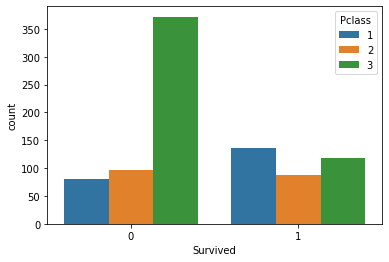

In [7]:
sns.countplot(x="Survived",hue="Pclass",data=df);

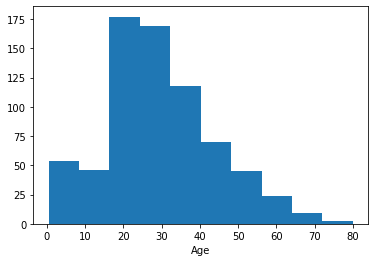

In [8]:
plt.hist(df["Age"])
plt.xlabel("Age");

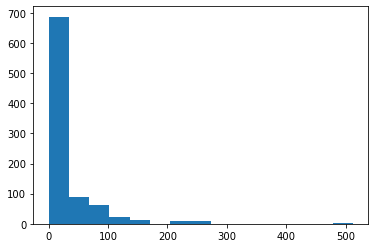

In [9]:
plt.hist(df["Fare"],bins=15);

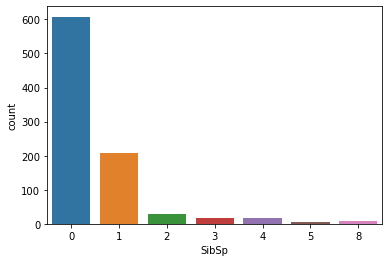

In [10]:
sns.countplot(x="SibSp",data=df);

# Data Wrangling

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.drop(columns=["PassengerId","Name","Cabin","Ticket"],inplace=True)

In [13]:
df.dropna(inplace=True)
print(df.shape)
df.head()

(712, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


# Dummy Encoding

In [15]:
sex=pd.get_dummies(df["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [17]:
pcl=pd.get_dummies(df["Pclass"],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [18]:
df1=pd.concat([df,sex,embark,pcl],axis=1)

In [19]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1


In [20]:
df1.drop(columns=["Sex","Pclass","Embarked"],inplace=True)
df1.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

In [21]:
X=df1.drop("Survived",axis=1)
y=df1["Survived"]


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=1)

# Model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression(solver="lbfgs",max_iter=300)

In [26]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [27]:
predictions=model.predict(X_test)

# Model Accuracy

In [28]:
from sklearn.metrics import classification_report

In [29]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.77      0.77        61\n           1       0.70      0.70      0.70        46\n\n    accuracy                           0.74       107\n   macro avg       0.73      0.73      0.73       107\nweighted avg       0.74      0.74      0.74       107\n'

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test,predictions)

array([[47, 14],
       [14, 32]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,predictions)

0.7383177570093458

# Evaluating Model

In [66]:
def wrangle(filepath):
    Xtest1=pd.read_csv(filepath)
    sex=pd.get_dummies(Xtest1["Sex"],drop_first=True)
    embark=pd.get_dummies(Xtest1["Embarked"],drop_first=True)
    pcl=pd.get_dummies(Xtest1["Pclass"],drop_first=True)
    Xtest1=pd.concat([Xtest1,sex,embark,pcl],axis=1)
    Xtest1.drop(columns=["Sex","Pclass","Embarked","PassengerId","Name","Cabin","Ticket"],inplace=True)
    Xtest1.dropna(inplace=True)
    return Xtest1

    

In [81]:
X_test_1=wrangle("titanic_test.csv")
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     331 non-null    float64
 1   SibSp   331 non-null    int64  
 2   Parch   331 non-null    int64  
 3   Fare    331 non-null    float64
 4   male    331 non-null    uint8  
 5   Q       331 non-null    uint8  
 6   S       331 non-null    uint8  
 7   2       331 non-null    uint8  
 8   3       331 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 14.5 KB


In [69]:
X_test_1.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [73]:
predict=model.predict(X_test_1)

In [91]:
predict[:6]

array([0, 0, 0, 0, 1, 0], dtype=int64)

In [87]:
df3=pd.DataFrame(predict)
df3.columns=["Survived"]
df3["PassengerId"]=range(1,332)

In [88]:
df3.head()

,Survived,PassengerId
0,0,1
1,0,2
2,0,3
3,0,4
4,1,5


In [89]:
df3.to_csv("gender_submission.csv",index=False)